# Chapter 11 Code

We begin with some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


Now we recreate figure 11.3.  Our first step is to set the parameters.

In [2]:
alpha = 0.6
Q = 2
R = 1
sigma = 0.1 # variance
mu = - sigma**2 / 2


Next we introduce useful functions.

In [3]:
@njit
def wage(k, z):
    return (1 - alpha) * (k**alpha) * z

@njit
def theta(w, lda):
    if (w < 1 - lda):
        return lda / (1 - w)
    else:
        return 1

@njit
def g(y): 
    return (y/alpha)**(1/(alpha-1)) 

@njit
def update(k, z, lda):
    " Update the state."
    return g(R / (Q * theta(wage(k, z), lda)))

@njit
def a(lda): 
    return g(R / (lda * Q))

@njit
def generate_ts(lda, init=None, seed=1234, ts_length=10_000):
    " Generate a time series from the model."
    np.random.seed(seed)
    K = np.empty(ts_length)  
    if init is None:
        init = a(lda)
    K[0] = init
    for t in range(ts_length-1):
        z = np.exp(mu + sigma * np.random.randn())
        K[t+1] = update(K[t], z, lda)  
    return K



Now we recreate the plot.

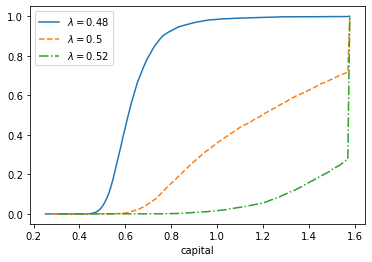

In [4]:
b = g(R / Q)

lambdas = 0.48, 0.5, 0.52
line_type = '-', '--', '-.'
mc_size = 5000
grid_size = 150

fig, ax = plt.subplots()

for lda, lt in zip(lambdas, line_type): 
    xvec = np.linspace(a(lda), b, grid_size)
    obs = generate_ts(lda, ts_length=mc_size)
    def ecdf(y):
        return sum(obs <= y) / mc_size
    yvec = [ecdf(x) for x in xvec]
    ax.plot(xvec, yvec, lt, label=f'$\\lambda={lda}$')

ax.set_xlabel('capital')
ax.legend()

plt.show()



Now we address exercise 11.26.

We need to determine the fraction of time the sample spends at the point $b$
in the state space over a long horizon, for different values of $\lambda$.

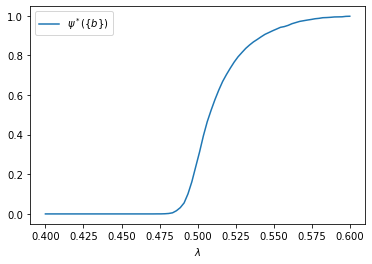

In [5]:
grid_size = 80
lambdas = np.linspace(0.4, 0.6, grid_size)
mc_size = 5000

prob_at_b = np.empty_like(lambdas)

for i, lda in enumerate(lambdas):
    obs = generate_ts(lda, ts_length=mc_size)
    prob_at_b[i] = np.mean(obs == b)

fig, ax = plt.subplots()
ax.plot(lambdas, prob_at_b, label='$\\psi^*(\{b\})$')
ax.set_xlabel('$\\lambda$')
ax.legend()

plt.show()

